## 請使用 MLPClassfier 建立 iris 預測模型

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.data[0:3,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [4]:
iris.target[0:3]

array([0, 0, 0])

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X = sc.fit_transform(iris.data)

In [27]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier((5,5,),activation= 'relu', solver = 'adam', max_iter = 1000)
mlp.fit(scaled_X, iris.target)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

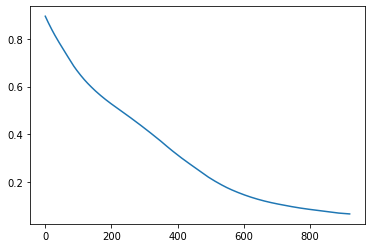

In [28]:
from matplotlib import pyplot as plt
plt.plot(range(len(mlp.loss_curve_)), mlp.loss_curve_)

In [29]:
predicted = mlp.predict(scaled_X)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(iris.target, predicted)

0.9666666666666667

In [31]:
confusion_matrix(iris.target, predicted)

array([[50,  0,  0],
       [ 0, 46,  4],
       [ 0,  1, 49]])

## Vanish Gradient

In [32]:
def sigmoid_function(x):
  return 1 / (1 +np.exp(-x))

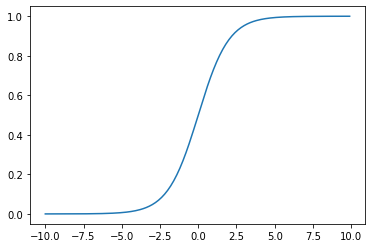

In [34]:
from matplotlib import pyplot as plt
import numpy as np
x = np.arange(-10,10,0.1)
y = sigmoid_function(x)
plt.plot(x,y)

In [35]:
def dfunc(f, x):
  h = 1e-4
  return (f(x+h) - f(x-h)) / (2*h)

In [37]:
d_y = dfunc(sigmoid_function,x )

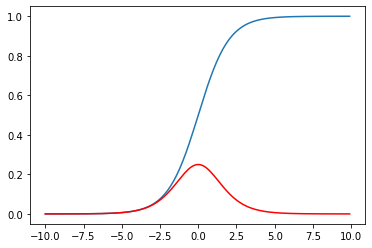

In [38]:
from matplotlib import pyplot as plt
import numpy as np
x = np.arange(-10,10,0.1)
y = sigmoid_function(x)
d_y = dfunc(sigmoid_function,x )
plt.plot(x,y)
plt.plot(x,d_y, c = 'red')

In [ ]:
#w = w - g*lr

## Suppoprt Vector Machine

In [40]:
X = iris.data[0:100:,[2,3]]
Y = iris.target[0:100]

In [43]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
clf1 = SVC(kernel = 'linear')
clf1.fit(X,Y)

clf2 = LogisticRegression()
clf2.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
def plot_estimator(estimator, X, y):
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
  np.arange(y_min, y_max, 0.1))
  Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.plot()
  plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.brg)
  plt.xlabel('Petal.Length')
  plt.ylabel('Petal.Width')
  plt.show()

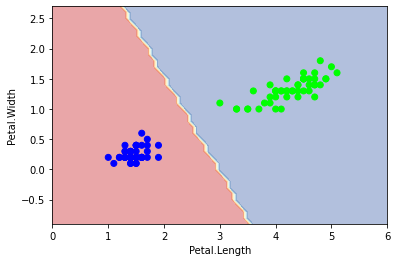

In [46]:
plot_estimator(clf1, X, Y)

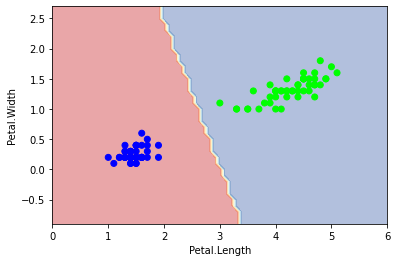

In [47]:
plot_estimator(clf2, X, Y)

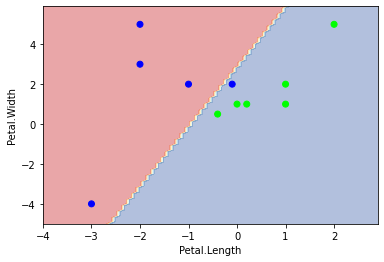

In [48]:
data = np.array([[-1,2,0],[-2,3,0],[-2,5,0],[-3,-4,0],[-0.1,2,0],[0.2,1,1],[0,1,1],[1,2,1], [1,1,1], [-
0.4,0.5,1],[2,5,1]])

X = data[:, :2]
Y = data[:,2]

# Large Margin
clf = SVC(C=1.0, kernel='linear')
clf.fit(X, Y)

plot_estimator(clf,X,Y)


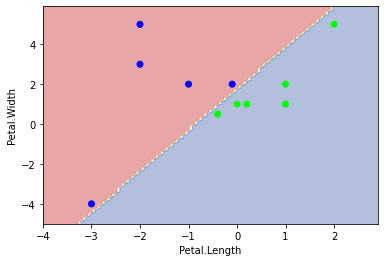

In [49]:
# Narrow Margin
clf = SVC(C=100000, kernel='linear')
clf.fit(X, Y)
plot_estimator(clf,X,Y)

In [58]:
iris = load_iris()
X = iris.data[:,[2,3]]
y = iris.target

In [65]:
clf1 = SVC(kernel="rbf", random_state = 123)
clf1.fit(X, y)

clf2 = SVC(kernel="poly")
clf2.fit(X, y)

clf3 = SVC(kernel="linear")
clf3.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

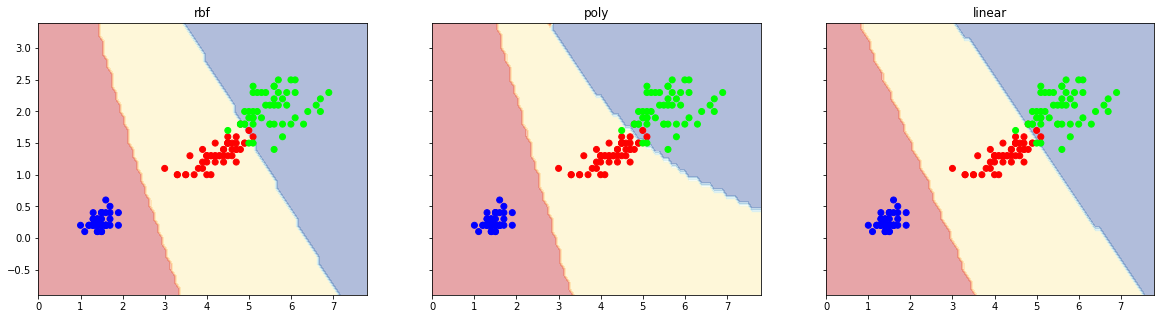

In [66]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
np.arange(y_min, y_max, 0.1))
f, axarr = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(20, 5))

for idx, clf, title in zip([0,1,2],[clf1, clf2, clf3], ['rbf', 'poly', 'linear']):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  axarr[idx].contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
  axarr[idx].scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.brg)
  axarr[idx].set_title(title)

## Check GPU

In [1]:
! nvidia-smi

Sat Jul 25 03:52:31 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
% tensorflow_version 2.x

In [3]:
import tensorflow as tf

In [4]:
tf.keras

<module 'tensorflow.keras' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/__init__.py'>

In [5]:
tf.__version__

'2.2.0'

In [6]:
tf.keras.__version__

'2.3.0-tf'

## Build MNIST Classfication Model

### Load Data

In [7]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [10]:
x_test.shape

(10000, 28, 28)

In [11]:
y_test.shape

(10000,)

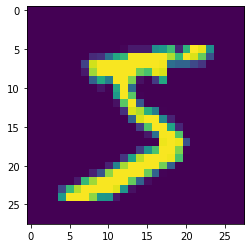

In [13]:
from matplotlib import pyplot as plt
plt.imshow(x_train[0])

In [14]:
y_train[0]

5

### Standardization

In [16]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10))

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [30]:
784 * 256 + 256

200960

In [31]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
loss_fn = SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='sgd',
       loss=loss_fn,
       metrics=['accuracy'])


In [32]:
model.fit(x_train, y_train, epochs=15, )

Epoch 1/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6024 - accuracy: 0.8465
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2855 - accuracy: 0.9182
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2350 - accuracy: 0.9327
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2011 - accuracy: 0.9427
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1752 - accuracy: 0.9500
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1548 - accuracy: 0.9559
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1387 - accuracy: 0.9608
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1252 - accuracy: 0.9641
Epoch 9/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1136 - accuracy: 0.9676
Epoch 10/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.103

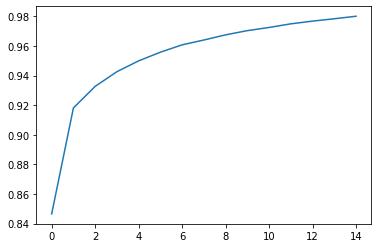

In [35]:
plt.plot(range(len(model.history.history['accuracy'])), model.history.history['accuracy'])

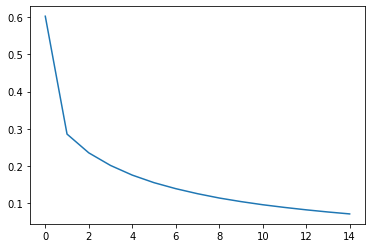

In [36]:
plt.plot(range(len(model.history.history['loss'])), model.history.history['loss'])

In [43]:
model(x_train[0:1]).numpy()

array([[ -2.077435  ,  -0.26123092,   2.6617558 ,  10.580385  ,
        -11.69802   ,  14.684195  ,  -3.6503956 ,   0.34268054,
         -1.6189126 ,  -0.41009328]], dtype=float32)

In [48]:
import numpy as np
np.argmax(model(x_test[0:1]).numpy(), axis = 1)

array([7])

In [49]:
predictions = np.argmax(model(x_test).numpy(), axis = 1)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9743

In [51]:
model.save('model.h5')

In [52]:
model2 = tf.keras.models.load_model('model.h5')

In [53]:
model2(x_train[0:1]).numpy()

array([[ -2.077435  ,  -0.26123092,   2.6617558 ,  10.580385  ,
        -11.69802   ,  14.684195  ,  -3.6503956 ,   0.34268054,
         -1.6189126 ,  -0.41009328]], dtype=float32)

In [54]:
model2.fit(x_test, y_test, epochs=15, )

Epoch 1/15
313/313 [==============================] - 1s 2ms/step - loss: 0.0875 - accuracy: 0.9730
Epoch 2/15
313/313 [==============================] - 1s 2ms/step - loss: 0.0762 - accuracy: 0.9771
Epoch 3/15
313/313 [==============================] - 1s 2ms/step - loss: 0.0688 - accuracy: 0.9783
Epoch 4/15
313/313 [==============================] - 1s 2ms/step - loss: 0.0634 - accuracy: 0.9812
Epoch 5/15
313/313 [==============================] - 1s 2ms/step - loss: 0.0587 - accuracy: 0.9828
Epoch 6/15
313/313 [==============================] - 1s 2ms/step - loss: 0.0548 - accuracy: 0.9846
Epoch 7/15
313/313 [==============================] - 1s 2ms/step - loss: 0.0509 - accuracy: 0.9870
Epoch 8/15
313/313 [==============================] - 1s 2ms/step - loss: 0.0482 - accuracy: 0.9877
Epoch 9/15
313/313 [==============================] - 1s 2ms/step - loss: 0.0452 - accuracy: 0.9893
Epoch 10/15
313/313 [==============================] - 1s 2ms/step - loss: 0.0427 - accuracy: 0.9902

## Pandas

In [4]:
import numpy
a = numpy.array([[1,2,3], [4,5,6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [3]:
import pandas
df = pandas.DataFrame([[1,2,3], [4,5,6]])
df

,0,1,2
0,1,2,3
1,4,5,6


In [5]:
df.columns = ['a' ,'b', 'c']
df

,a,b,c
0,1,2,3
1,4,5,6


In [6]:
df['a']

0    1
1    4
Name: a, dtype: int64

In [7]:
df['b']

0    2
1    5
Name: b, dtype: int64

In [8]:
numpy.array([[1,'a'], [2,'b']])

array([['1', 'a'],
       ['2', 'b']], dtype='<U21')

In [9]:
pandas.DataFrame([[1,'a'], [2,'b']])

,0,1
0,1,a
1,2,b


## Customer Churn Analysis

### Read Data

In [10]:
import pandas
df = pandas.read_csv('https://github.com/ywchiu/tibamedl/raw/master/Data/customer_churn.csv', index_col=0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


1. 結構化資料
2. 沒有缺失值(Missing Value)
3. 所有資料必須是數值資料

In [12]:
df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

### Data Preporcessing

In [14]:
df = df.iloc[:,3:]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 1 to 3333
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   international_plan             3333 non-null   object 
 1   voice_mail_plan                3333 non-null   object 
 2   number_vmail_messages          3333 non-null   int64  
 3   total_day_minutes              3333 non-null   float64
 4   total_day_calls                3333 non-null   int64  
 5   total_day_charge               3333 non-null   float64
 6   total_eve_minutes              3333 non-null   float64
 7   total_eve_calls                3333 non-null   int64  
 8   total_eve_charge               3333 non-null   float64
 9   total_night_minutes            3333 non-null   float64
 10  total_night_calls              3333 non-null   int64  
 11  total_night_charge             3333 non-null   float64
 12  total_intl_minutes             3333 non-null   f

In [15]:
df.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [19]:
import pandas
#pandas.get_dummies(df['international_plan'])

In [21]:
df['international_plan'] = df['international_plan'].replace({'yes': 1, 'no':0})

In [23]:
df['voice_mail_plan'] = df['voice_mail_plan'].replace({'yes': 1, 'no':0})

In [24]:
df['churn'] = df['churn'].replace({'yes': 1, 'no':0})

In [25]:
df.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
2,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
3,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
4,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
5,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [26]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [28]:
X.head(3)

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
2,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
3,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0


In [29]:
y.head(3)

1    0
2    0
3    0
Name: churn, dtype: int64

### Standardization
- (x - mu) /std

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X = sc.fit_transform(X)

## Using ANN to train model

In [32]:
% tensorflow_version 2.x

In [33]:
scaled_X.shape

(3333, 16)

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Dense => x * w + b
model = Sequential()
model.add(Dense(8,activation='relu',input_dim=16))
model.add(Dense(8,activation='relu',))
model.add(Dense(1,activation = 'sigmoid'))

In [40]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 9         
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer='sgd',
       loss='binary_crossentropy',
       metrics=['accuracy'])

In [43]:
history = model.fit(scaled_X, y,
          batch_size=30,
          epochs  = 100,
          verbose  = 0)

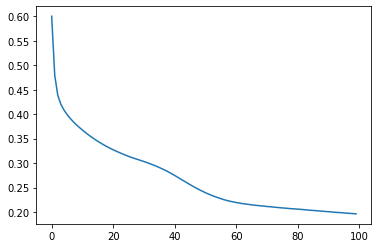

In [44]:
from matplotlib import pyplot as plt
plt.plot(range(len(history.history.get('loss'))), history.history.get('loss'))

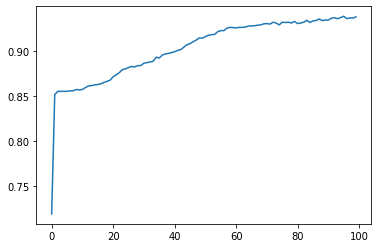

In [45]:
from matplotlib import pyplot as plt
plt.plot(range(len(history.history.get('accuracy'))), history.history.get('accuracy'))

### Evaluation

In [46]:
predictions = model(scaled_X).numpy()

In [51]:
predicted_y = (predictions > 0.5).flatten().astype(int)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y, predicted_y)

0.9375937593759376

## Choosing Optimizer

In [54]:
import pandas
df = pandas.read_csv('https://github.com/ywchiu/tibamedl/raw/master/Data/customer_churn.csv', index_col=0, header = 0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [55]:
df = df.iloc[:,3:]
cat_var = ['international_plan','voice_mail_plan', 'churn']

for var in cat_var:
    df[var] = df[var].map(lambda e: 1 if e == 'yes' else 0)
y = df.iloc[:,-1]
x = df.iloc[:,:-1]

In [56]:
x.head(3)

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
2,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
3,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0


In [57]:
y.head(3)

1    0
2    0
3    0
Name: churn, dtype: int64

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x = sc.fit_transform(x)

In [59]:
%tensorflow_version 2.x

In [60]:
import tensorflow as tf

In [61]:
def tarinProcess(optimizer):
  model = Sequential()
  model.add(Dense(units = 8, activation = 'relu', input_dim = 16))
  model.add(Dense(units = 1,activation = 'sigmoid'))
  model.compile(loss='binary_crossentropy',
         optimizer=optimizer,
         metrics=['accuracy'])

  history = model.fit(scaled_x,y,
            batch_size=30,
            epochs=100,
            verbose=0,
            )
  return history

In [63]:
sgd_history = tarinProcess('sgd')

In [64]:
rmsprop_history = tarinProcess('RMSprop')

In [65]:
adagrad_history = tarinProcess('Adagrad')

In [66]:
adadelta_history = tarinProcess('Adadelta')

In [67]:
adam_history = tarinProcess('Adam')

In [68]:
sgd_history.history.keys()

dict_keys(['loss', 'accuracy'])

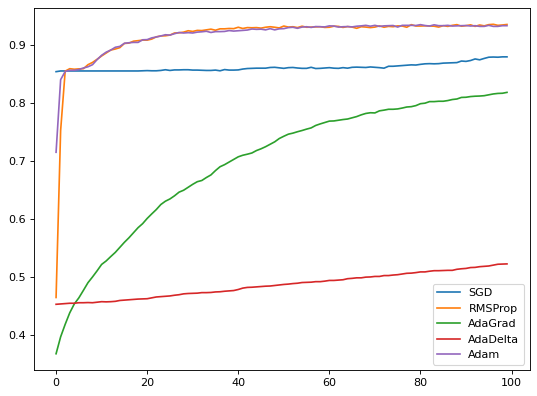

In [69]:
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(sgd_history.epoch, sgd_history.history.get('accuracy'), label='SGD')
plt.plot(rmsprop_history.epoch, rmsprop_history.history.get('accuracy'), label='RMSProp')
plt.plot(adagrad_history.epoch, adagrad_history.history.get('accuracy'), label='AdaGrad')
plt.plot(adadelta_history.epoch, adadelta_history.history.get('accuracy'), label='AdaDelta')
plt.plot(adam_history.epoch, adam_history.history.get('accuracy'), label='Adam')

plt.legend()
plt.show()

## Training and Testing

In [70]:
import pandas
df = pandas.read_csv('https://github.com/ywchiu/tibamedl/raw/master/Data/customer_churn.csv', index_col=0, header = 0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [71]:
df = df.iloc[:,3:]
cat_var = ['international_plan','voice_mail_plan', 'churn']

for var in cat_var:
    df[var] = df[var].map(lambda e: 1 if e == 'yes' else 0)
y = df.iloc[:,-1]
x = df.iloc[:,:-1]

In [72]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = 0.33, random_state =42)

In [73]:
x.shape

(3333, 16)

In [74]:
train_x.shape

(2233, 16)

In [75]:
test_x.shape

(1100, 16)

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)

In [79]:
test_x = sc.transform(test_x)

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Dense => x * w + b
model = Sequential()
model.add(Dense(8,activation='relu',input_dim=16))
model.add(Dense(8,activation='relu',))
model.add(Dense(1,activation = 'sigmoid'))

In [82]:
model.compile(optimizer='sgd',
       loss='binary_crossentropy',
       metrics=['accuracy'])

In [83]:
history = model.fit(train_x, train_y,
          batch_size = 30,
          epochs   = 100,
          verbose   = 0,
          validation_data = (test_x, test_y))

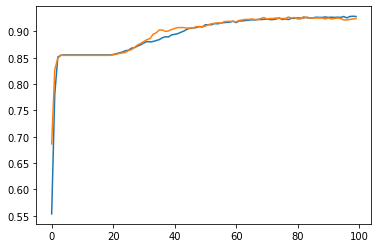

In [85]:
plt.plot(range(len(history.history.get('accuracy'))),history.history.get('accuracy'))
plt.plot(range(len(history.history.get('val_accuracy'))),history.history.get('val_accuracy'))

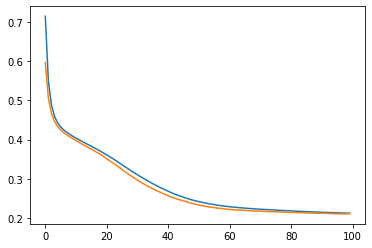

In [86]:
plt.plot(range(len(history.history.get('loss'))),history.history.get('loss'))
plt.plot(range(len(history.history.get('val_loss'))),history.history.get('val_loss'))

## K-fold cross validation

In [88]:
def buildClassifier(optimizer):
  model = Sequential()                                 
  model.add(Dense(8, activation='relu', input_dim = 16))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

In [89]:
from sklearn.model_selection import cross_val_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
classifier = KerasClassifier(build_fn = buildClassifier, 
               batch_size = 30, 
               epochs   = 100, 
               verbose   = 0, 
               optimizer  = 'adam')

accuracies = cross_val_score(estimator = classifier, X = train_x, y = train_y, cv = 5)

In [90]:
accuracies

array([0.89709175, 0.93736017, 0.94854587, 0.90582961, 0.93273544])

In [91]:
accuracies.mean()

0.9243125677108764

In [92]:
accuracies.std()

0.019550093010984575

## Dropout

In [93]:
from tensorflow.keras.layers import Dropout
def buildClassifierWithDropout(optimizer):
  model = Sequential()                                 
  model.add(Dense(8, activation='relu', input_dim = 16))
  model.add(Dropout(rate = 0.1))
  model.add(Dense(8, activation='relu'))
  model.add(Dropout(rate = 0.1))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

In [94]:
classifier = KerasClassifier(build_fn = buildClassifierWithDropout, 
               batch_size = 30, 
               epochs   = 100, 
               verbose   = 0, 
               optimizer  = 'adam')

accuracies = cross_val_score(estimator = classifier, X = train_x, y = train_y, cv = 5)

In [95]:
accuracies

array([0.89709175, 0.94630873, 0.93512303, 0.89461881, 0.9147982 ])

In [96]:
accuracies.mean()

0.9175881028175354

In [97]:
accuracies.std()

0.0204343863182917

## Regularization

In [103]:
def buildClassifierWithRegularizer(optimizer):
  model = Sequential()                                                        
  model.add(Dense(8, activation='relu', input_dim = 16))
  model.add(Dense(8, activation='relu',activity_regularizer=tf.keras.regularizers.l2(0.01)))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

In [104]:
classifier = KerasClassifier(build_fn = buildClassifierWithRegularizer, 
               batch_size = 30, 
               epochs   = 100, 
               verbose   = 0, 
               optimizer  = 'adam')

accuracies = cross_val_score(estimator = classifier, X = train_x, y = train_y, cv = 5)

In [105]:
accuracies

array([0.90827739, 0.93959731, 0.94407159, 0.90807176, 0.92600894])

In [106]:
accuracies.mean()

0.925205397605896

In [107]:
accuracies.std()

0.015124979705134314

In [108]:
classifier.get_params()

{'batch_size': 30,
 'build_fn': <function __main__.buildClassifierWithRegularizer>,
 'epochs': 100,
 'optimizer': 'adam',
 'verbose': 0}

In [116]:
from sklearn.model_selection import KFold
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()

kf = KFold(n_splits=10)
iris = load_iris()
X = iris.data
y = iris.target
models = []
for train, test in kf.split(X):
  train_X, test_X, train_y, test_y = X[train],X[test], y[train], y[test]
  clf = DecisionTreeClassifier()
  clf.fit(train_X, train_y)
  models.append(clf)
  predicted = clf.predict(test_X)
  print(accuracy_score(test_y, predicted))

1.0
1.0
1.0
0.9333333333333333
0.9333333333333333
0.8666666666666667
1.0
0.8666666666666667
0.8
1.0


In [117]:
models[0]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Grid Search

In [124]:
import pandas
df = pandas.read_csv('https://github.com/ywchiu/tibamedl/raw/master/Data/customer_churn.csv', index_col=0, header = 0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [125]:
df = df.iloc[:,3:]
cat_var = ['international_plan','voice_mail_plan', 'churn']

for var in cat_var:
    df[var] = df[var].map(lambda e: 1 if e == 'yes' else 0)
y = df.iloc[:,-1]
x = df.iloc[:,:-1]

In [126]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = 0.33, random_state =42)

In [127]:
from sklearn.model_selection import GridSearchCV

classifier = KerasClassifier(
    build_fn = buildClassifierWithDropout, 
    epochs = 10,
    verbose = 0)

parameters = {'batch_size': [10, 15],
        'optimizer': ['adam', 'rmsprop']}

grid_search = GridSearchCV(estimator = classifier,
               param_grid = parameters,
               scoring = 'accuracy',
               cv = 2)

grid_search     = grid_search.fit(train_x, train_y)
best_parameters = grid_search.best_params_
best_accuracy   = grid_search.best_score_

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [128]:
best_accuracy

0.8553525187474129

In [129]:
best_parameters

{'batch_size': 15, 'optimizer': 'rmsprop'}

In [130]:
grid_search.estimator

## Compare Model

In [ ]:
#999 : 0
#1  : 1

#90%

In [131]:
import pandas
df = pandas.read_csv('https://github.com/ywchiu/tibamedl/raw/master/Data/customer_churn.csv', index_col=0, header = 0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [132]:
df = df.iloc[:,3:]
cat_var = ['international_plan','voice_mail_plan', 'churn']

for var in cat_var:
    df[var] = df[var].map(lambda e: 1 if e == 'yes' else 0)
y = df.iloc[:,-1]
x = df.iloc[:,:-1]

In [133]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = 0.33, random_state =42)

In [134]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)

In [135]:
test_x = sc.transform(test_x)

In [136]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Dense => x * w + b
model = Sequential()
model.add(Dense(8,activation='relu',input_dim=16))
model.add(Dense(8,activation='relu',))
model.add(Dense(1,activation = 'sigmoid'))

In [137]:
model.compile(optimizer='sgd',
       loss='binary_crossentropy',
       metrics=['accuracy'])

In [138]:
history = model.fit(train_x, train_y,
          batch_size = 30,
          epochs   = 100,
          verbose   = 0,
          validation_data = (test_x, test_y))

In [144]:
predicted_y = (model(test_x).numpy() > 0.5 ).flatten().astype(int)

In [145]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_y, predicted_y)

0.9281818181818182

In [146]:
confusion_matrix(test_y, predicted_y)

array([[920,  20],
       [ 59, 101]])

In [147]:
# type1 error: 20 * 24000
# type2 error: 59 * 2000


In [150]:
predicted_y = (model(test_x).numpy() > 0.8 ).flatten().astype(int)
confusion_matrix(test_y, predicted_y)

array([[936,   4],
       [126,  34]])

In [152]:
predicted_y = (model(test_x).numpy() > 0.5 ).flatten().astype(int)
m = confusion_matrix(test_y, predicted_y)
m

array([[920,  20],
       [ 59, 101]])

In [153]:
TP = m[0,0]
FP = m[0,1]
FN = m[1,0]
TN = m[1,1]

#False Positive Rate
FPR = FP / (FP + TN)

#True Positive Rate
TPR = TP / (TP + FN)

In [154]:
FPR

0.1652892561983471

In [155]:
TPR

0.9397344228804902

In [ ]:

import numpy as np
TPR_ary = [1]
FPR_ary = [1]
for cutoff in np.arange(0,1,0.1):
  y_pred = (predictions > cutoff)
  cm = confusion_matrix(y_test, y_pred )
  TP = cm[0,0]
  FP = cm[0,1]
  FN = cm[1,0]
  TN = cm[1,1]
  TPR = TP / (TP + FN)
  FPR = FP / (FP + TN)
  if pandas.notnull(TPR) and pandas.notnull(FPR): 
    TPR_ary.append(TPR)
    FPR_ary.append(FPR)
TPR_ary.append(0)
FPR_ary.append(0)

In [163]:
import numpy as np
cutoffs = np.arange(0,1,0.1)
TPR_ary = [1]
FPR_ary = [1]
for curoff in cutoffs:
  predicted_y = (model(test_x).numpy() > curoff ).flatten().astype(int)
  m = confusion_matrix(test_y, predicted_y)
  TP = m[0,0]
  FP = m[0,1]
  FN = m[1,0]
  TN = m[1,1]
  FPR = FP / (FP + TN)
  TPR = TP / (TP + FN)
  if pandas.notnull(FPR) and pandas.notnull(TPR):
    FPR_ary.append(FPR)
    TPR_ary.append(TPR)
TPR_ary.append(0)
FPR_ary.append(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]


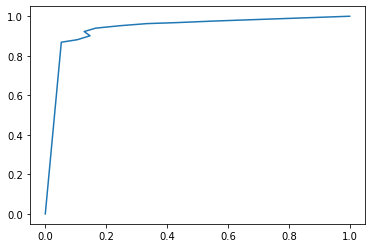

In [164]:
plt.plot(FPR_ary,TPR_ary)

In [165]:
predictions = model(test_x).numpy()

In [166]:
from sklearn.metrics import roc_curve
fpr_ary, tpr_ary, thresholds = roc_curve(test_y, predictions)

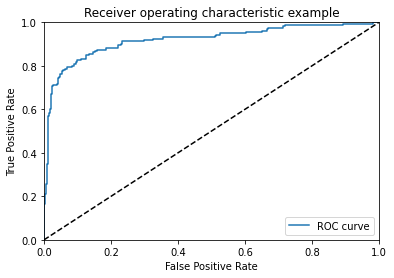

In [168]:
import matplotlib.pyplot as plt
plt.plot(fpr_ary, tpr_ary, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [169]:
from sklearn.metrics import auc
auc(fpr_ary, tpr_ary)

0.9185704787234044

In [170]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(train_x, train_y)

clf2 = SVC(probability = True)
clf2.fit(train_x, train_y)

clf3 = LogisticRegression()
clf3.fit(train_x, train_y)

clf4 = RandomForestClassifier()
clf4.fit(train_x, train_y)

clf5 = GradientBoostingClassifier()
clf5.fit(train_x, train_y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

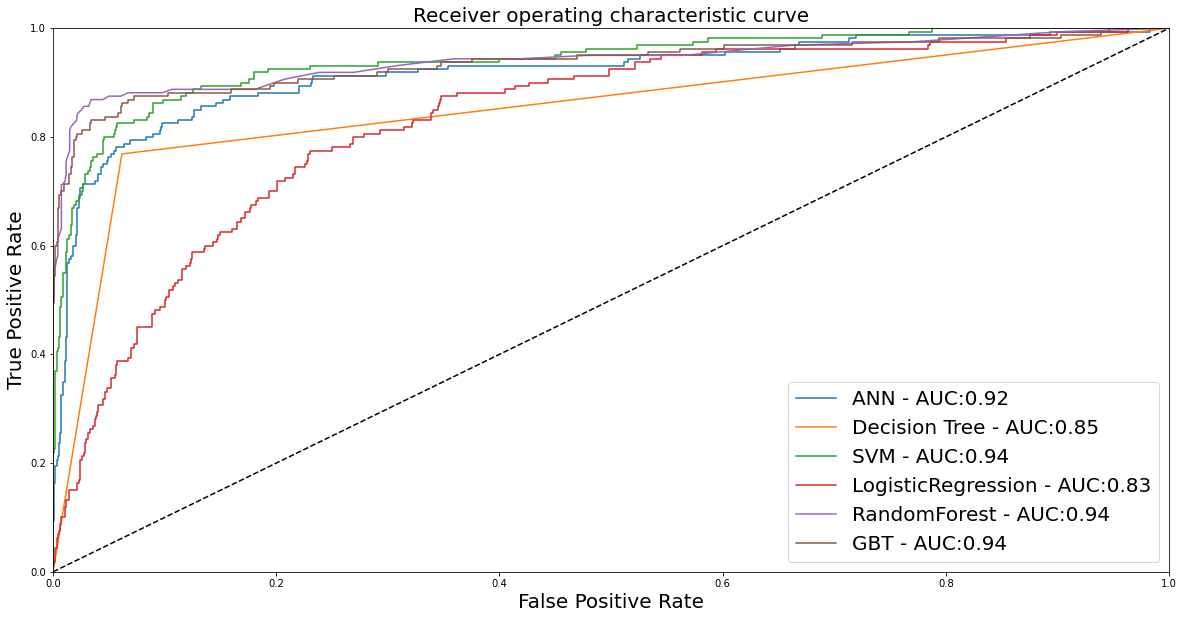

In [172]:
plt.figure(figsize= [20,10])

for clf, title in zip([model,clf1,clf2,clf3,clf4,clf5], 
             ['ANN','Decision Tree','SVM','LogisticRegression','RandomForest','GBT']):
  if title != 'ANN':
    probas_ = clf.predict_proba(test_x)
    fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
  else:
    y_pred = clf(test_x).numpy()
    fpr, tpr, thresholds = roc_curve(test_y, y_pred)
  plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic curve', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

## Train a model to classify fashion object

In [174]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [175]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

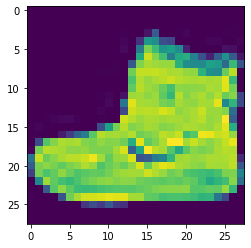

In [176]:
plt.imshow(train_images[0])


In [178]:
class_names[train_labels[0]]


'Ankle boot'

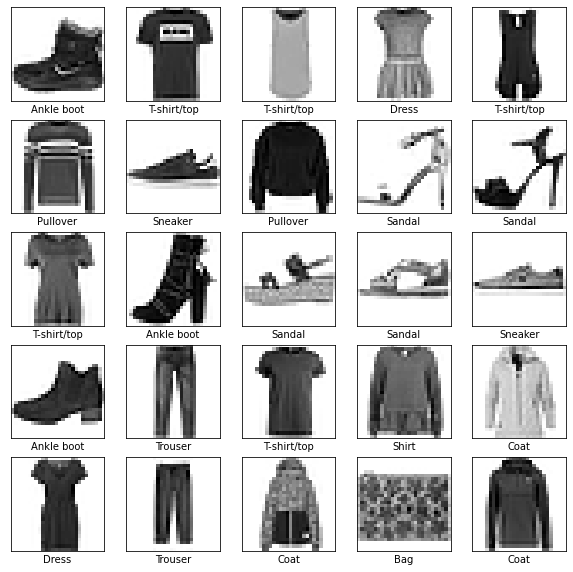

In [179]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [202]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [203]:
from tensorflow.keras.layers import Flatten
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10))

In [204]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(optimizer='adam',
       loss=SparseCategoricalCrossentropy(from_logits=True),
       metrics=['accuracy'])

In [212]:
model.fit(train_images, train_labels, 
     epochs=10,
    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2301 - accuracy: 0.9136 - val_loss: 0.3341 - val_accuracy: 0.8819
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2213 - accuracy: 0.9162 - val_loss: 0.3315 - val_accuracy: 0.8879
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2152 - accuracy: 0.9196 - val_loss: 0.3304 - val_accuracy: 0.8875
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2081 - accuracy: 0.9220 - val_loss: 0.3305 - val_accuracy: 0.8882
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2022 - accuracy: 0.9243 - val_loss: 0.3340 - val_accuracy: 0.8868
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1961 - accuracy: 0.9269 - val_loss: 0.3334 - val_accuracy: 0.8889
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1919 - accuracy: 0.9288 - val_loss: 0.3407 - val_accuracy:

In [213]:
predicted_y = np.argmax(model(test_images).numpy(),axis = 1)

In [214]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_labels, predicted_y)

0.8803

In [215]:
confusion_matrix(test_labels, predicted_y)

array([[794,   3,  19,  28,   4,   2, 143,   0,   7,   0],
       [  1, 979,   0,  14,   2,   0,   2,   0,   2,   0],
       [ 16,   1, 878,  10,  32,   0,  63,   0,   0,   0],
       [ 12,   9,  15, 905,  28,   1,  26,   0,   3,   1],
       [  0,   0, 219,  33, 664,   1,  82,   0,   1,   0],
       [  0,   0,   0,   0,   0, 978,   0,  14,   0,   8],
       [ 98,   1, 113,  29,  34,   1, 714,   0,  10,   0],
       [  0,   0,   0,   0,   0,  21,   0, 953,   0,  26],
       [  4,   0,   7,   4,   0,   5,   3,   3, 974,   0],
       [  0,   0,   0,   0,   0,   4,   1,  31,   0, 964]])

In [219]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [220]:
import numpy as np
y_pred = np.argmax(predictions,axis = 1)

In [221]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

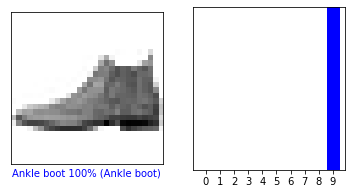

In [222]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

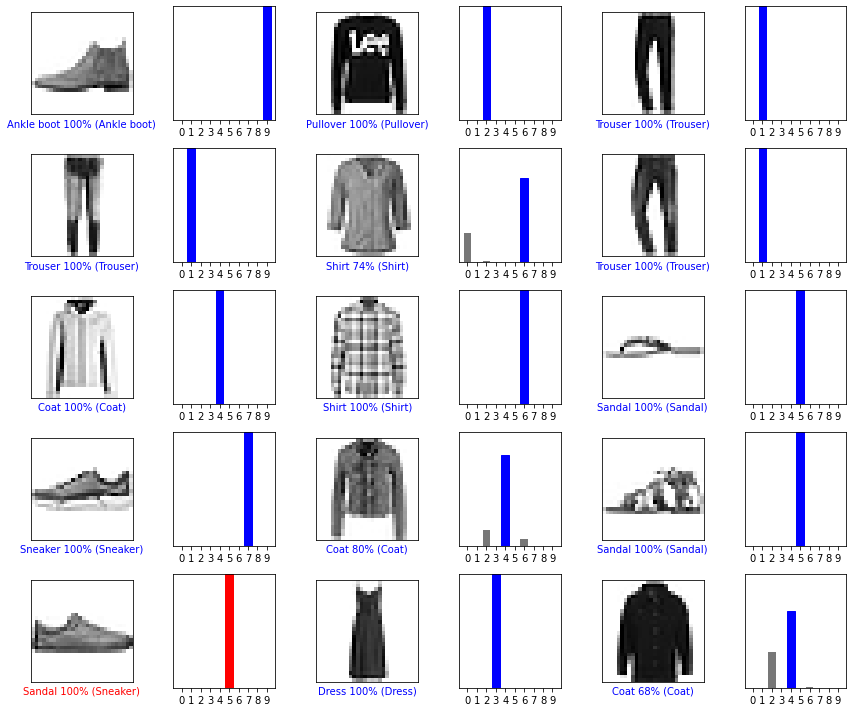

In [223]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## 作業

目標: 建立一深度學習模型預測客戶是否流失

- 問題一: 請將資料區分為訓練與測試資料集
- 問題二: 請將資料標準化
- 問題三: 使用Keras 建立深度學習模型預測客戶是否流失
- 問題四: 評估模型準確度
- 問題五: 請繪製ROC Curve, 並求出 AUC
- 問題六: 請比較 ANN, SVM, Gradient Boosting, Random Forest, Logist Regression, Decision Tree 各模型的 AUC 與 ROC Curve

### Tips:

remove RowNumber, CustomerId, Surname

dummyvariable: Geography, Gender

In [224]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/Churn_Modelling.csv', header = 0 )
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [227]:
geography = pandas.get_dummies(df['Geography'])
del geography['France']
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
